# Project 1:
### Team Members: Dana Nave, Jinming Chen, Marla Goodman

# Introduction:

Our client is an investor located in Houston, TX. He is interested in investing in the airline industry. Therefore, he is looking to learn more about the strengths and weaknesses of local airlines. The better an airline is, the more it can withstand global changes, such as fluctuating oil prices and other socioeconomic events. In addition to the airline industry, our investor might like to understand some of the local business opportunities related to the industry.

### The client wants to know the following:

#### 1) Which airline has the highest number of flights out of Houston? What is the difference between the top five airlines?

The number of flights out of Houston allows the investor to have a better understanding of airline operation out of the Houston airports. A higher number of flights can be an indication of the industry leaders in that location. The more a product is used, the more likely it will be a good product to invest in. We plan to summarize the data based on the busiest carrier leaving from the Houston airports. We will only present the top 5 results.

#### 2) Which five carriers have the highest average arrival delays and highest average departure delays?

The answers here are important because they show the strengths and weaknesses of each carrier. An airline with a high average of delays would discourage people from using that airline. This in turn would lower business for the airline, resulting in lower profits. Our investor would want to avoid investing in a product that has a major weakness and subsequent loss of business. We will summarize the data based on the average number of both arrival delays and departure delays of each of the carriers operating in Houston. We will present the top 5 results for each of the delay options.

#### 3) What are the most common destinations for flights out of the Houston airports? What is the difference between the top five destinations?

The answer to this question can help the client to understand the general air industry. In turn, he will better inform himself of some of the local business opportunities related to the industry. If a certain airport is receiving lots of people from many flights, an investment could also be made within the airport(s) that get(s) the most foot traffic. An example of such investments could be hotels and taxis within that region. We will summarize the data based on the most popular destinations for flights leaving from Houston airports. We will only present the top 5 results.

# Data Preparation:

#### First, we are importing our required python packages and our data:


In [2]:
#Data preperation - importing the NumPy and Pandas packages
import numpy as np
import pandas as pd

np.set_printoptions(suppress = True)

# creating a new DataFrame named pd.airlines with an imported csv data
pd.airlines = pd.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv')

#printing the original dataset
pd.airlines

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,187.0,...,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,210.0,...,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,...,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,...,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0


#### Next, we are cleaning up the dataset to show the only data directly related to our client's insterests and needs:

In [3]:
# droping irrelevent columns: 
# calling the drop function to eliminate any columns that are irrelevant to our research
Houston_Airports = pd.airlines.drop(['Diverted','TailNum','Distance','CancellationCode', 'Cancelled', 'Month', 'DayofMonth', 'DayOfWeek','Year', 'TaxiIn', 'TaxiOut'],axis =1)

#bringing up the updated data set
print('The updated dataset named Houston_Airports:')
Houston_Airports

The updated dataset named Houston_Airports:


,DepTime,ArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest
0,1400.0,1500.0,AA,428,60.0,40.0,-10.0,0.0,IAH,DFW
1,1401.0,1501.0,AA,428,60.0,45.0,-9.0,1.0,IAH,DFW
2,1352.0,1502.0,AA,428,70.0,48.0,-8.0,-8.0,IAH,DFW
3,1403.0,1513.0,AA,428,70.0,39.0,3.0,3.0,IAH,DFW
4,1405.0,1507.0,AA,428,62.0,44.0,-3.0,5.0,IAH,DFW
...,...,...,...,...,...,...,...,...,...,...
19995,1126.0,1333.0,CO,1719,187.0,152.0,8.0,-4.0,IAH,MTJ
19996,941.0,1111.0,CO,1723,210.0,193.0,0.0,11.0,IAH,ONT
19997,722.0,948.0,CO,1746,146.0,115.0,-17.0,-3.0,IAH,ORD
19998,1909.0,2216.0,CO,1748,127.0,106.0,-10.0,12.0,IAH,FLL


# Exploratory Data Analysis:

### Question 1:

Which airline has the highest number of flights out of Houston? What is the difference between the top five airlines?

In [4]:
# counting the number of flights using the carrier name
# creating a new DataFrame calles Most_Flights
# calling the loc function to access the UniqueCarrier column and rows
# calling the value_counts function to count the amount of data entries of the UniqueCarrier name
# calling the head function to print only the first 5 rows of the data
Most_Flights = Houston_Airports.loc[:,'UniqueCarrier'].value_counts().head()

#printing the results
print('The top carriers with the highest number of flights leaving from Houston airports are:')
print(Most_Flights)

print()

# creating a new DataFrame to calculate the difference between the results
# calling the diff function to calculate the differences between our 5 top results
# printing our results
Most_Flights_Diff = Most_Flights.diff()
print('The gaps between the number of flights each of the top 5 airlines are:')
print(Most_Flights_Diff)

The top carriers with the highest number of flights leaving from Houston airports are:
CO    6830
XE    6775
WN    3708
OO     699
AA     519
Name: UniqueCarrier, dtype: int64

The gaps between the number of flights each of the top 5 airlines are:
CO       NaN
XE     -55.0
WN   -3067.0
OO   -3009.0
AA    -180.0
Name: UniqueCarrier, dtype: float64


#### Conclusion:

The airline with the highest number of flights out of Houston airport is Continental Airlines (CO) with 6,830 during the period of time the database represents. This is an indication for the investor that Continental Airlines is the busiest airline in Houston and has the largest investment potential. The gap between Continental Airlines and ExpressJet Airlines (XE) is very small - 55 flights. The next airlines have a very large difference in the number of flights - over 3000 less than Continental Airlines and ExpressJet Airlines. This gap provides a clear indication that there are 2 very big players within the Houston region.

### Question 2:

Which five carriers have the highest average arrival delays and highest average departure delays?

In [5]:
# creating a new DataFrame called Arrival_Delay_Time
# calling the loc function to access both carrier and ArrDelay columns and rows
Arrival_Delay_Time = Houston_Airports.loc[:,('UniqueCarrier','ArrDelay')]

# creating new dataframe called Arrivals_Delay, and setting the following parameters to it:
# grouping the information according to the carrier, presenting only the top 5
# calling groupby function to summarize our data according to the UniqueCarrier initials
# calling the mean function to calculate the average arrival delay of each UniqueCarrier 
# calling the sort_value function in order to arrange our results by the highest average arrival delay
# calling the head function to print only the first 5 rows of the data
# printing the results
Arrivals_Delay=Arrival_Delay_Time.groupby('UniqueCarrier').mean().sort_values(by='ArrDelay',ascending = False).head()
print('The top 5 carriers that have the highest arrival delay times are:')
Arrivals_Delay

The top 5 carriers that have the highest arrival delay times are:


,ArrDelay
UniqueCarrier,
EV,13.927083
F9,13.725806
B6,11.086022
AS,9.396552
WN,8.644941


In [6]:
# creating a new DataFrame called Departure_Delay
# calling the loc function to access both carrier and DepDelay columns and rows
Departure_Delay = Houston_Airports.loc[:,('UniqueCarrier','DepDelay')]

# creating new dataframe called Departures_Delay, and setting the following parameters to it:
# grouping the information according to the carrier, presenting only the top 5
# calling groupby function to summarize our data according to the UniqueCarrier initials
# calling the mean function to calculate the average departure delay of each UniqueCarrier 
# calling the sort_value function in order to arrange our results by the highest average departure delay
# calling the head function to print only the first 5 rows of the data
# printing the results
Departures_Delay=Departure_Delay.groupby('UniqueCarrier').mean().sort_values(by='DepDelay',ascending = False).head()
print('The top 5 carriers that have the highest departure delay times are:')
Departures_Delay

The top 5 carriers that have the highest departure delay times are:


,DepDelay
UniqueCarrier,
EV,21.742268
B6,18.234043
WN,14.394336
MQ,9.901538
CO,9.881251


#### Conclusion:

There are many delays in both the departure and arrival times. EVA Air (EV) has been experiencing the highest number of delays in both departure and arrival, which indicates to the investor that it might not be a good company to invest in because they probably have bad ratings from consumers. They may even offer cheaper airline tickets as a result, which means they might report low revenues. In addition, both JetBlue (B6) and Southwest Airlines (WN) appear in the top 5 carriers that experience arrival and departure delay. These are very large airlines that operate in multiple airports around the US and globally, and this fact might indicate a pattern that is larger than the Houston airports. It can affect the investor's calculations.

### Question 3:

What are the most common destinations for flights out of the Houston airports? What is the difference between the top five destinations?


In [7]:
# creating a new DataFrame calles Most_Common_Dest
# calling the loc function to access the Dest column and rows
# calling the value_counts function to count the amount of data entries for Destination
# calling the head function to print only the first 5 rows of the data
Most_Common_Dest = Houston_Airports.loc[:,'Dest'].value_counts().head()

# printing the results
print('The top 5 destinations for customers out of Houston airports are:')
print(Most_Common_Dest)
print()

#creating a new DataFrame to calculate the difference between the results
#calling the diff function to calculate the differences between our 5 top results
#printing our results
Common_Flights_Diff = Most_Common_Dest.diff()
print('The differences between the 5 most common destinations travelers fly to out of Houston are:')
print(Common_Flights_Diff)


The top 5 destinations for customers out of Houston airports are:
DAL    884
DFW    735
MSY    635
ATL    623
DEN    509
Name: Dest, dtype: int64

The differences between the 5 most common destinations travelers fly to out of Houston are:
DAL      NaN
DFW   -149.0
MSY   -100.0
ATL    -12.0
DEN   -114.0
Name: Dest, dtype: float64


#### Conclusion:

The most common destination out of Houston is Dallas, TX. The first 2 destinations in the list are in Dallas, TX: Love Field Airport (DAL) and Dallas/Fort Worth International Airport (DFW). The next destinations are: Louis Armstrong New Orleans International Airport (MSY), Hartsfield-Jackson Atlanta International Airport (ATL) and Denver International Airport (DEN). All 5 airports are within less than 5 hours of flight from Houston. We can assume that Texas related business opportunities are affected by that often-utilized short-distance flights. *****For example, if an airport is only domestic and the majority of the flights are short-distance, then the number of hotels in the airport region will be smaller in comparison to an international airport with long-distance flights.***

# Research Results:


#### The stastical summaries indicate the following: 

1. The mean number of flights for the five top airlines is 3706 with a standard deviation of 3097. This summary shows that the range of flights between the different companies is high, with a minimum of 519 and a maximum of 6830. Therefore, we can conclude that even among the 5 companies that had the highest number of outgoing flights from Houston, there's a high variance. This suggests that only a small number of companies use Houston as a central hub. These conclusions show that Houston might suffer from an oligopoly that constrains competition. 

2. The mean arrival delay of the five airlines that experience the most delays is 11 minutes, which depending on the flight time, can be a long or short time frame. The same hold for departure delays, with a means of 14 minutes. 

3. The mean number for the five top destinations is 677 with a standard deviation of 140. This summary shows that the range of flights between the different companies is high, with a minimum of 509 and a maximum of 884. While there are large differences between each destination, we can see from the summary statistics that they all fall into a relatively small range of 375. 

In [8]:
#Question 1
#creating summary statistics for Most_Flights
Most_Flights.describe()

count       5.000000
mean     3706.200000
std      3097.465044
min       519.000000
25%       699.000000
50%      3708.000000
75%      6775.000000
max      6830.000000
Name: UniqueCarrier, dtype: float64

In [9]:
#Question 2 
#creating summary statistics for Arrivals_Delay
Arrivals_Delay.describe()

,ArrDelay
count,5.000000
mean,11.356081
std,2.423253
min,8.644941
25%,9.396552
50%,11.086022
75%,13.725806
max,13.927083


In [10]:
#Question 2
#creating summary statistics for Departures_Delay
Departures_Delay.describe()

,DepDelay
count,5.000000
mean,14.830687
std,5.204244
min,9.881251
25%,9.901538
50%,14.394336
75%,18.234043
max,21.742268


In [11]:
#Question 3
#creating summary statistics for Most_Common_Dest
Most_Common_Dest.describe()

count      5.000000
mean     677.200000
std      140.638544
min      509.000000
25%      623.000000
50%      635.000000
75%      735.000000
max      884.000000
Name: Dest, dtype: float64

### Research results for question 1

As can be seen from the visual aids below, there is a small gap between CO and XE airlines, followed by a steep drop in the number of flights. We can conclude that the CO and XE are the industry leaders in the Houston airports. 

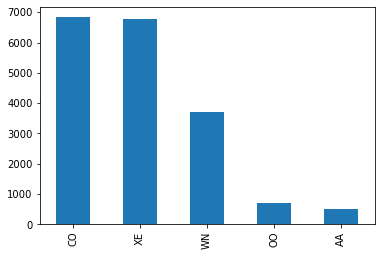

In [12]:
#plotting a bar chart to visualize the results of Most_Flights dataframe
Most_Flights.plot.bar()

#### Our difference graph proves our conclusion that there's a major drop off from the two leading airlines to the other airlines:

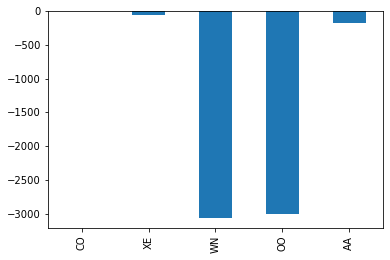

In [19]:
#plotting a bar chart to visualize the results of Most_Flights_Diff dataframe
Most_Flights_Diff.plot.bar()

### Research results for question 2

As can be seen from the charts below, Southwest Airlines (WN) has been experiencing delays in both arrival and departure, which is an indication of the company's weakness. However, it is not as bad as others. In fact, JetBlue Airlines (B6) and EVA Air (EV) suffer from major arrival and departure delays. 

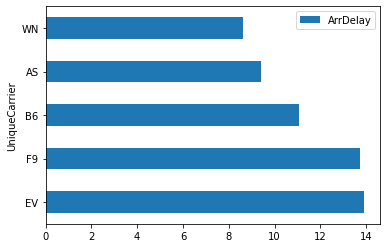

In [14]:
#plotting a horizontal bar chart to visualize the results of Arrivals_Delay dataframe
Arrivals_Delay.plot.barh()

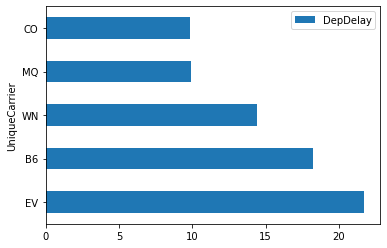

In [15]:
#plotting a horizontal bar chart to visualize the results of Departures_Delay dataframe
Departures_Delay.plot.barh()

### Research results for question 3

As our graphs show, there is an obvious destination to which the majority of the Houston flights go, which is Dallas, TX. In addition, the next three destinations are also within the 5 hour flight range from Houston, meaning that Houston airports operate as a central location for Mid-western travel.

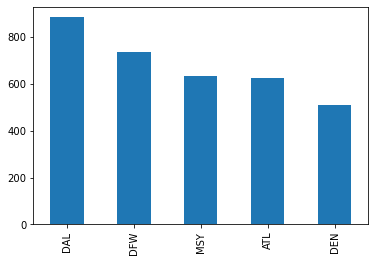

In [16]:
#plotting a bar chart to visualize the results of Most_Common_Dest dataframe
Most_Common_Dest.plot.bar()

#### The differences between the most common destinations:

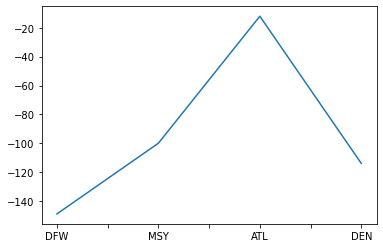

In [17]:
#plotting a line chart to visualize the results of the Common_Flights_Diff dataframe
Common_Flights_Diff.plot.line()

# Conclusion:

Looking at our results, we see two airlines with excellent potential for investments: AA - American Airlines, and XE - ExpressJet Airlines. 

ExpressJet Airlines and American Airlines both do not appear on either delay list. American Airlines is #5 on the most common flights results, while ExpressJet is #2 in the results.

Continental Airlines would also be considered a good investment, but further research would have to be conducted for their departure delays.

For further investments related to the airlines industry, our client can look towards business opportunities in Dallas. It can be investing in taxi services or car rentals near the two Dallas airports in our results for question 3. These two airports receive the most flights from Houston, meaning the area around the airports see many daily travelers. Travelers make use of car services, which in turn creates a lot of revenue for those Dallas industries.

This is great information for our client. It allows him to see the best airlines and airport areas to invest in, in Houston. However, seeing as he is a businessman, he may also want a report on the financials of these airlines.  This could be a great extension of our project. We could find yearly and/or quarterly financial reports and balance sheets for each carrier heading out of Houston for the same amount of time as our first data set. The reports could confirm or negate our findings here. However, the numebrs would most likely confirm our findings. The strengths of these three airlines make them profitable, and therefore, good investments. 